In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
NewsArticles = fetch_20newsgroups(subset='all',
                            remove=('headers','footers','quotes'),
                            data_home='/work/ma384/DataSets/Newsgroups', #pkz file only need to go to the directory
                            download_if_missing=False)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# create corpus dataframe
GroupNames = pd.Series(NewsArticles.target_names)
corpus = pd.DataFrame()
corpus['group']      = NewsArticles.target
corpus['group_names'] = GroupNames[NewsArticles.target].values
corpus['articles']    = NewsArticles.data
print(corpus.shape)
corpus.head()

(18846, 3)


,group,group_names,articles
0,10,rec.sport.hockey,\n\nI am sure some bashers of Pens fans are pr...
1,3,comp.sys.ibm.pc.hardware,My brother is in the market for a high-perform...
2,17,talk.politics.mideast,\n\n\n\n\tFinally you said what you dream abou...
3,3,comp.sys.ibm.pc.hardware,\nThink!\n\nIt's the SCSI card doing the DMA t...
4,4,comp.sys.mac.hardware,1) I have an old Jasmine drive which I cann...


## 1 gram

In [4]:
vectorizer = TfidfVectorizer(analyzer = 'word', stop_words= 'english', norm = 'l1')

In [5]:
word_tfidf = vectorizer.fit_transform(corpus.articles.values)
print(round(word_tfidf,2))

  (0, 22942)	0.01
  (0, 29416)	0.02
  (0, 29793)	0.02
  (0, 30409)	0.01
  (0, 30989)	0.03
  (0, 32124)	0.02
  (0, 38965)	0.02
  (0, 40109)	0.01
  (0, 44206)	0.04
  (0, 44922)	0.02
  (0, 49321)	0.01
  (0, 52286)	0.02
  (0, 53378)	0.01
  (0, 54152)	0.02
  (0, 55396)	0.03
  (0, 56276)	0.01
  (0, 56290)	0.01
  (0, 57968)	0.02
  (0, 67564)	0.02
  (0, 68455)	0.04
  (0, 68851)	0.02
  (0, 69968)	0.01
  (0, 71591)	0.02
  (0, 71631)	0.01
  (0, 73308)	0.01
  :	:
  (18845, 105990)	0.01
  (18845, 106361)	0.0
  (18845, 107288)	0.01
  (18845, 107841)	0.01
  (18845, 108286)	0.01
  (18845, 108448)	0.01
  (18845, 108562)	0.01
  (18845, 109047)	0.01
  (18845, 109116)	0.01
  (18845, 110501)	0.01
  (18845, 110981)	0.01
  (18845, 111070)	0.01
  (18845, 113859)	0.01
  (18845, 113880)	0.01
  (18845, 114648)	0.01
  (18845, 115367)	0.01
  (18845, 117361)	0.01
  (18845, 118367)	0.01
  (18845, 118486)	0.01
  (18845, 122267)	0.0
  (18845, 122408)	0.01
  (18845, 123189)	0.01
  (18845, 125969)	0.01
  (18845, 126098)

In [6]:
word_tfidf.shape

(18846, 134101)

In [7]:
word_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
words = pd.Series(vectorizer.get_feature_names())
words

0              00
1             000
2            0000
3           00000
4          000000
           ...   
134096     zzzzzz
134097    zzzzzzt
134098     ³ation
134099         ýé
134100    ÿhooked
Length: 134101, dtype: object

In [9]:
word_idf = pd.Series(vectorizer.idf_,index=words)
word_idf.round(2)

00          4.85
000         4.72
0000        8.45
00000       8.76
000000     10.15
           ...  
zzzzzz     10.15
zzzzzzt    10.15
³ation     10.15
ýé         10.15
ÿhooked    10.15
Length: 134101, dtype: float64

In [10]:
attributes = pd.DataFrame(word_tfidf.toarray(),columns=words)
attributes.round(2)

,00,000,0000,00000,000000,00000000,0000000004,00000000b,00000001,00000001b,...,zzs,zzvsi,zzy_3w,zzz,zzzoh,zzzzzz,zzzzzzt,³ation,ýé,ÿhooked
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
attributes.shape

(18846, 134101)

In [12]:
target = corpus.group
target.shape

(18846,)

In [13]:
hparam = {'alpha': [1e-10, 0.1, 0.2, 0.3, 0.4, 0.5]}

In [14]:
NBayes = MultinomialNB()

In [15]:
NBayesCV = GridSearchCV(NBayes, param_grid=hparam, return_train_score=True)

In [16]:
NBayesCV.fit(attributes,target)

GridSearchCV(cv=None, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 0.1, 0.2, 0.3, 0.4, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

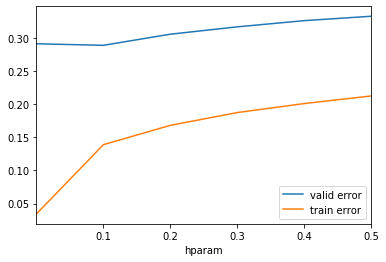

In [19]:
results = pd.DataFrame()
results['hparam'] = hparam['alpha']
results['valid error'] = 1 - NBayesCV.cv_results_['mean_test_score']
results['train error'] = 1 - NBayesCV.cv_results_['mean_train_score']
results = results.set_index('hparam', drop=True)
results.plot(kind='line')

In [20]:
results.head(3)

,valid error,train error
hparam,,
1.000000e-10,0.291043,0.034530
1.000000e-01,0.288708,0.138942
2.000000e-01,0.305476,0.168073


In [21]:
NBayesCV.best_params_

{'alpha': 0.1}

In [22]:
error_bayes = 1- NBayesCV.best_score_
print('Naive Bayes error rate:', error_bayes.round(2))

Naive Bayes error rate: 0.29


In [23]:
prob = NBayesCV.best_estimator_.predict_proba(attributes)
classes = NBayesCV.best_estimator_.classes_
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [24]:
# baseline-> biggest group
round(1 - corpus['group'].value_counts().max() / corpus.shape[0],3)

0.947

In [25]:
print("NB valid error rate:", round(1 - NBayesCV.best_score_, 3))
print("NB train error rate:", round(results['train error'].min(), 4))

NB valid error rate: 0.289
NB train error rate: 0.0345


## 2 gram

In [26]:
vectorizer = TfidfVectorizer(analyzer = 'word', stop_words= 'english', norm = 'l2')

In [29]:
word_tfidf = vectorizer.fit_transform(corpus.articles.values)
print(round(word_tfidf,2))
word_tfidf.toarray()
words = pd.Series(vectorizer.get_feature_names())
word_idf = pd.Series(vectorizer.idf_,index=words)
word_idf.round(2)

  (0, 22942)	0.06
  (0, 29416)	0.14
  (0, 29793)	0.1
  (0, 30409)	0.06
  (0, 30989)	0.2
  (0, 32124)	0.14
  (0, 38965)	0.1
  (0, 40109)	0.08
  (0, 44206)	0.22
  (0, 44922)	0.13
  (0, 49321)	0.07
  (0, 52286)	0.1
  (0, 53378)	0.09
  (0, 54152)	0.13
  (0, 55396)	0.19
  (0, 56276)	0.07
  (0, 56290)	0.08
  (0, 57968)	0.12
  (0, 67564)	0.11
  (0, 68455)	0.25
  (0, 68851)	0.11
  (0, 69968)	0.04
  (0, 71591)	0.09
  (0, 71631)	0.07
  (0, 73308)	0.09
  :	:
  (18845, 105990)	0.08
  (18845, 106361)	0.04
  (18845, 107288)	0.05
  (18845, 107841)	0.06
  (18845, 108286)	0.09
  (18845, 108448)	0.09
  (18845, 108562)	0.11
  (18845, 109047)	0.13
  (18845, 109116)	0.06
  (18845, 110501)	0.09
  (18845, 110981)	0.1
  (18845, 111070)	0.06
  (18845, 113859)	0.1
  (18845, 113880)	0.08
  (18845, 114648)	0.06
  (18845, 115367)	0.06
  (18845, 117361)	0.09
  (18845, 118367)	0.1
  (18845, 118486)	0.08
  (18845, 122267)	0.04
  (18845, 122408)	0.09
  (18845, 123189)	0.09
  (18845, 125969)	0.07
  (18845, 126098)	0.09

00          4.85
000         4.72
0000        8.45
00000       8.76
000000     10.15
           ...  
zzzzzz     10.15
zzzzzzt    10.15
³ation     10.15
ýé         10.15
ÿhooked    10.15
Length: 134101, dtype: float64

In [30]:
attributes.shape

(18846, 134101)

In [31]:
target = corpus.group
target.shape

(18846,)

In [32]:
hparam = {'alpha': [1e-10, 0.1, 0.2, 0.3, 0.4, 0.5]}
#np.linspace(0,0.1,101)}
NBayes = MultinomialNB()
NBayesCV = GridSearchCV(NBayes, param_grid=hparam, return_train_score=True)
NBayesCV.fit(attributes,target)

GridSearchCV(cv=None, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 0.1, 0.2, 0.3, 0.4, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

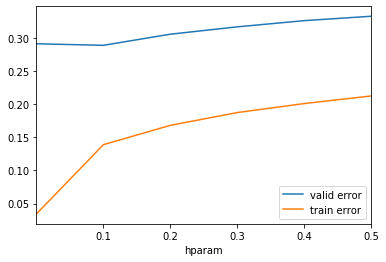

In [33]:
results = pd.DataFrame()
results['hparam'] = hparam['alpha']
results['valid error'] = 1 - NBayesCV.cv_results_['mean_test_score']
results['train error'] = 1 - NBayesCV.cv_results_['mean_train_score']
results = results.set_index('hparam', drop=True)
results.plot(kind='line')

In [34]:
NBayesCV.best_params_

{'alpha': 0.1}

In [35]:
error_bayes = 1- NBayesCV.best_score_
print('Naive Bayes error rate:', error_bayes.round(2))

Naive Bayes error rate: 0.29


In [36]:
prob = NBayesCV.best_estimator_.predict_proba(attributes)
classes = NBayesCV.best_estimator_.classes_
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [37]:
# baseline
round(1 - corpus['group'].value_counts().max() / corpus.shape[0],3)

0.947

In [38]:
print("NB valid error rate:", round(1 - NBayesCV.best_score_, 3))
print("NB train error rate:", round(results['train error'].min(), 4))

NB valid error rate: 0.289
NB train error rate: 0.0345


## 3 gram

In [49]:
vectorizer = TfidfVectorizer(analyzer = 'word', stop_words= 'english', ngram_range = (1,2))

In [50]:
word_tfidf = vectorizer.fit_transform(corpus.articles.values)
print(round(word_tfidf,2))
word_tfidf.toarray()
words = pd.Series(vectorizer.get_feature_names())
word_idf = pd.Series(vectorizer.idf_,index=words)
word_idf.round(2)

  (0, 130387)	0.04
  (0, 130488)	0.09
  (0, 207267)	0.09
  (0, 207272)	0.1
  (0, 211289)	0.06
  (0, 211408)	0.1
  (0, 219525)	0.04
  (0, 220337)	0.1
  (0, 226003)	0.12
  (0, 226598)	0.1
  (0, 226625)	0.1
  (0, 226654)	0.1
  (0, 239232)	0.08
  (0, 239245)	0.1
  (0, 332713)	0.06
  (0, 332760)	0.1
  (0, 353794)	0.05
  (0, 353891)	0.09
  (0, 402334)	0.13
  (0, 402346)	0.1
  (0, 402427)	0.1
  (0, 413189)	0.08
  (0, 413201)	0.1
  (0, 461346)	0.04
  (0, 461828)	0.1
  :	:
  (18845, 1197242)	0.08
  (18845, 1199687)	0.05
  (18845, 1199770)	0.08
  (18845, 1207629)	0.03
  (18845, 1208083)	0.08
  (18845, 1213061)	0.04
  (18845, 1213181)	0.08
  (18845, 1245181)	0.05
  (18845, 1245193)	0.08
  (18845, 1256584)	0.06
  (18845, 1256587)	0.08
  (18845, 1257854)	0.05
  (18845, 1257960)	0.08
  (18845, 1289052)	0.02
  (18845, 1290186)	0.08
  (18845, 1298021)	0.05
  (18845, 1298034)	0.06
  (18845, 1301740)	0.05
  (18845, 1301756)	0.08
  (18845, 1323860)	0.04
  (18845, 1324030)	0.07
  (18845, 1327093)	0.05
  (

00                4.85
00 00             7.59
00 000            9.23
00 0020          10.15
00 00am          10.15
                 ...  
³ation area      10.15
ýé               10.15
ýé interested    10.15
ÿhooked          10.15
ÿhooked line     10.15
Length: 1388659, dtype: float64

In [51]:
attributes.shape

(18846, 134101)

In [52]:
target = corpus.group
target.shape

(18846,)

In [53]:
hparam = {'alpha': [1e-10, 0.1, 0.2, 0.3, 0.4, 0.5]}
#np.linspace(0,0.1,101)}
NBayes = MultinomialNB()
NBayesCV = GridSearchCV(NBayes, param_grid=hparam, return_train_score=True)
NBayesCV.fit(attributes,target)

GridSearchCV(cv=None, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 0.1, 0.2, 0.3, 0.4, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

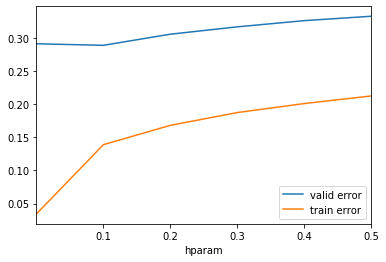

In [56]:
#results = pd.DataFrame()
#results['hparam'] = hparam['alpha']
#results['alpha'] = param_grid['alpha']
#results['train error'] = 1 - NBayesCV.cv_results_['mean_test_score']
#results.plot.line(x='alpha', y=' validation error')

results = pd.DataFrame()
results['hparam'] = hparam['alpha']
results['valid error'] = 1 - NBayesCV.cv_results_['mean_test_score']
results['train error'] = 1 - NBayesCV.cv_results_['mean_train_score']
results = results.set_index('hparam', drop=True)
results.plot(kind='line')

In [57]:
NBayesCV.best_params_

{'alpha': 0.1}

In [58]:
error_bayes = 1- NBayesCV.best_score_
print('Naive Bayes error rate:', error_bayes.round(2))

Naive Bayes error rate: 0.29


In [59]:
prob = NBayesCV.best_estimator_.predict_proba(attributes)
classes = NBayesCV.best_estimator_.classes_
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [60]:
# baseline
round(1 - corpus['group'].value_counts().max() / corpus.shape[0],3)

0.947

In [61]:
print("NB valid error rate:", round(1 - NBayesCV.best_score_, 3))
print("NB train error rate:", round(results['train error'].min(), 4))

NB valid error rate: 0.289
NB train error rate: 0.0345
